

# Project: IMDB Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>













## Introduction

In this project I will analyze the movie revenues and popularity in the years 2015 and 2014 and display drawings




In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
% matplotlib inline






### Data Wrangling







### General Properties

###### Read the data file for analysis
 



In [5]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Number of rows and columns

In [8]:
df.shape

(10866, 21)

#### General information for the data and how many null records per column

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

#### How many null are in this data ?
 


In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64














### Data Cleaning 

#### Delete all columns that I don't need in the analysis

In [8]:
df.drop(['budget','director','genres','production_companies','release_date','vote_count','vote_average','budget_adj','revenue_adj','id','imdb_id','cast','homepage','tagline','overview','runtime','keywords'],axis=1,inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 4 columns):
popularity        10866 non-null float64
revenue           10866 non-null int64
original_title    10866 non-null object
release_year      10866 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 339.6+ KB


#### Is there any duplicated ?

In [21]:
df.duplicated().sum()

1

#### Dropping the row

In [23]:
df.drop_duplicates(inplace=True)


#### Confirmation there is no duplicated 

In [24]:
df.duplicated().sum()


0








## Exploratory Data Analysis










### What are the highest revenue movies in the year 2015 and 2014 ?

In [15]:
years = df[df.release_year >= 2014]

In [16]:
years

,popularity,revenue,original_title,release_year
0,32.985763,1513528810,Jurassic World,2015
1,28.419936,378436354,Mad Max: Fury Road,2015
2,13.112507,295238201,Insurgent,2015
3,11.173104,2068178225,Star Wars: The Force Awakens,2015
4,9.335014,1506249360,Furious 7,2015
5,9.110700,532950503,The Revenant,2015
6,8.654359,440603537,Terminator Genisys,2015
7,7.667400,595380321,The Martian,2015
8,7.404165,1156730962,Minions,2015
9,6.326804,853708609,Inside Out,2015


In [18]:
df_Top_revenue=years.sort_values('revenue',axis=0,ascending=False)
Top_revenue=df_Top_revenue[['original_title','revenue']]
print('Top 10 Movies by Revenue Between 2014 and 2015')
print(Top_revenue.head(10))

Top 10 Movies by Revenue Between 2014 and 2015
                                original_title     revenue
3                 Star Wars: The Force Awakens  2068178225
0                               Jurassic World  1513528810
4                                    Furious 7  1506249360
14                     Avengers: Age of Ultron  1405035767
8                                      Minions  1156730962
634  The Hobbit: The Battle of the Five Armies   955119788
10                                     Spectre   880674609
9                                   Inside Out   853708609
630                    Guardians of the Galaxy   773312399
660                                 Maleficent   758410378


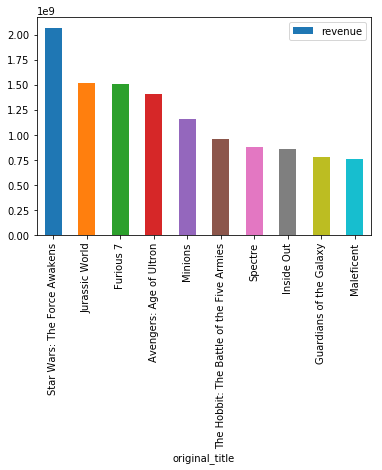

In [30]:
bar_revenue = years.groupby('original_title', as_index=False)['revenue'].mean()
bar_revenue_top=bar_revenue.sort_values('revenue',axis=0,ascending=False).head(10)
bar_revenue_top.plot.bar('original_title','revenue');

### What are the highest popularity movies in the year 2015 and 2014 ?

In [27]:
df_Top_popularity=years.sort_values('popularity',axis=0,ascending=False)
Top_popularity=df_Top_popularity[['original_title','popularity']]
print('Top 10 Movies by popularity Between 2014 and 2015')
print(Top_popularity.head(10))



Top 10 Movies by popularity Between 2014 and 2015
                                original_title  popularity
0                               Jurassic World   32.985763
1                           Mad Max: Fury Road   28.419936
629                               Interstellar   24.949134
630                    Guardians of the Galaxy   14.311205
2                                    Insurgent   13.112507
631        Captain America: The Winter Soldier   12.971027
632                                  John Wick   11.422751
3                 Star Wars: The Force Awakens   11.173104
633      The Hunger Games: Mockingjay - Part 1   10.739009
634  The Hobbit: The Battle of the Five Armies   10.174599


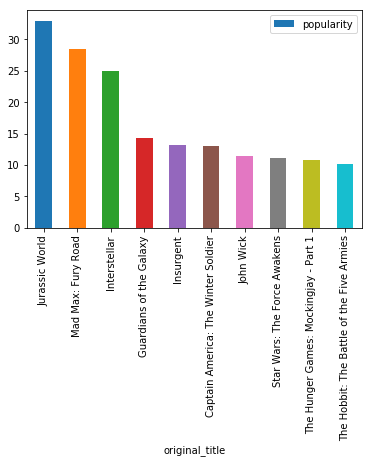

In [31]:
bar_popularity = years.groupby('original_title', as_index=False)['popularity'].mean()
bar_popularity_top=bar_popularity.sort_values('popularity',axis=0,ascending=False).head(10)
bar_popularity_top.plot.bar('original_title','popularity');

## Conclusion

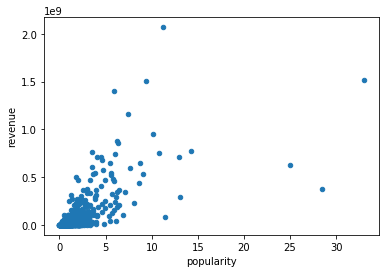

In [28]:
years.plot.scatter('popularity', 'revenue');

### In this project I worked by analyzing revenue and popularity and whether they have a relationship or not, After analysis there is no relationship in the increase in revenue in the popularity of the movie

In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0